好吧，这足以完成一些实际工作！让我们看看到目前为止有什么可能。
### 和弦将移至何处？
到目前为止，让我们来欣赏我们最喜欢的作品，巴赫的BWV 66.6，看看每个和弦的去向。

我们将一如既往地开始music21从语料库导入和解析工作。

In [1]:
from music21 import *
s = corpus.parse('bwv66.6')

现在让我们整理一下。

In [2]:
sChords = s.chordify()
sChords

<music21.stream.Part Soprano>

sChords是不包含和弦的声部！它具有包含和弦的小节。我们将要查看所有的和弦，所以让我们用来展平它.flat。

In [3]:
sFlat = sChords.flat
sFlat

<music21.stream.Part Soprano_flat>

内部sChords不仅是和弦，还包括拍号等，因此让我们创建一个仅在sChords中包含和弦的Stream。我们将摆脱所有内部限制，措施等。为此，我们将使用 .getElementsByClass('Chord')它：

In [4]:
sOnlyChords = sFlat.getElementsByClass('Chord')
sOnlyChords

<music21.stream.iterator.StreamIterator for Part:Soprano_flat @:0>

我们最终将要显示每个和弦，因此我们将创建一个新的和弦Stream。我们将其作为Part对象：

In [5]:
displayPart = stream.Part(id='displayPart')
displayPart

<music21.stream.Part displayPart>

现在，我们要查看每个和弦及其后的和弦，因此我们要从第一个和弦index 0转到第二个和最后一个和弦index ，然后获取每个和弦和下一个和弦。我们将使用以下命令序列进行操作len(sOnlyChords) - 1

In [6]:
for i in range(0, len(sOnlyChords) - 1):
    thisChord = sOnlyChords[i]
    nextChord = sOnlyChords[i + 1]
    # do something with thisChord and nextChord here

Python提示：或是一个“生成器”函数，它产生的每个数字都以（以零为单位，如果没有给出最小值）以小于最大值的数字开头。是一个非常有用的函数，我们将一直使用它在很多项目上执行相同的操作。例如：range(min, max)range(max)minrange()

In [7]:
for n in range(5):
    print(n)

0
1
2
3
4


然后，对于每个和弦对，我们可以创建一个新的小节并将其附加到 displayPart只有每组的第一个和弦是三和弦或第七个和弦的情况下。为了使本示例简短，仅当第一个和弦的根是“ A”时才进行操作。我们可以将它们全部关闭。

我们可以创建一个新函数来执行所有操作并调用它 appendChordPairs()

In [8]:
def appendChordPairs(thisChord, nextChord):
    if ((thisChord.isTriad() is True or
            thisChord.isSeventh() is True) and
                thisChord.root().name == 'A'):
        closePositionThisChord = thisChord.closedPosition(forceOctave=4)
        closePositionNextChord = nextChord.closedPosition(forceOctave=4)

        m = stream.Measure()
        m.append(closePositionThisChord)
        m.append(closePositionNextChord)
        displayPart.append(m)

好的，我想我们已经设置好了。让我们将“ ” 替换为：# do somethingappendChordPairs()

In [9]:
for i in range(len(sOnlyChords) - 1):
    thisChord = sOnlyChords[i]
    nextChord = sOnlyChords[i + 1]
    appendChordPairs(thisChord, nextChord)

有吗 让我们看看里面displayPart有什么吗？

In [10]:
len(displayPart)

7

好吧，我们只将其限制为建立在七和弦上的和弦 A。让我们来看看它！

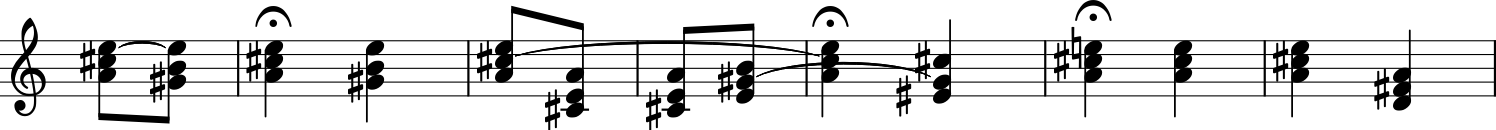

In [11]:
displayPart.show()

从上一章中学到，我们可以在A键上用罗马数字标记和弦。显然，第一个和弦始终是“ I”，但是“ I”将移至何处？那更有趣。我们将作弊，并使用一种分析技术，稍后将在第23章中看到 。

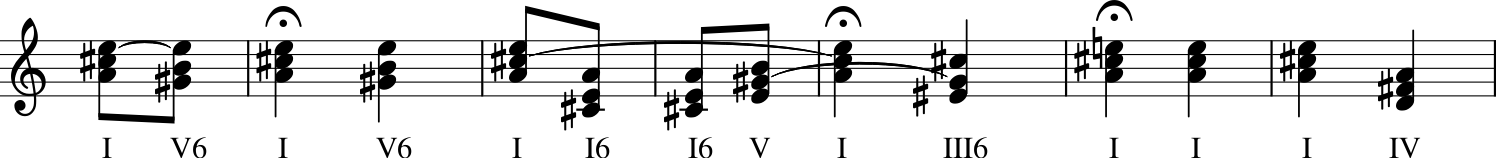

In [12]:
keyA = key.Key('A')
for c in displayPart.recurse().getElementsByClass('Chord'):
    rn = roman.romanNumeralFromChord(c, keyA)
    c.addLyric(str(rn.figure))

displayPart.show()

好吧，基本上就是我所期望的一切，除了那个 III6和弦！我闻到这里发生了调制。让该Chord的所有音高变粉红色，以便稍后找到它们。并且，我们将轻柔地引入一个新概念derivation.chain()（请参阅 第13章），以确保此注释来自的所有内容也是粉红色的。

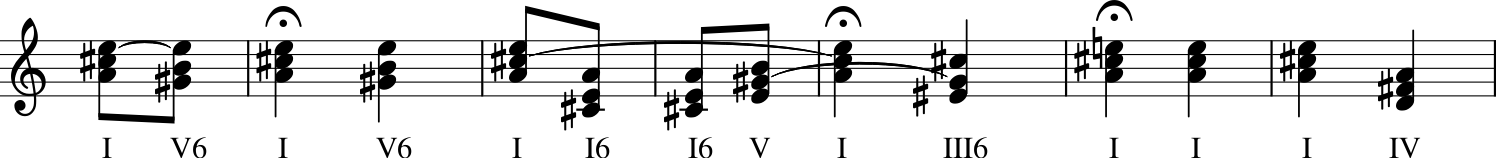

In [13]:
for c in displayPart.recurse().getElementsByClass('Chord'):
    if c.lyric == 'III6':
        c.color = 'pink'
        for x in c.derivation.chain():
            x.color = 'pink'

displayPart.show()

现在，我们可以更轻松地找到该和弦：

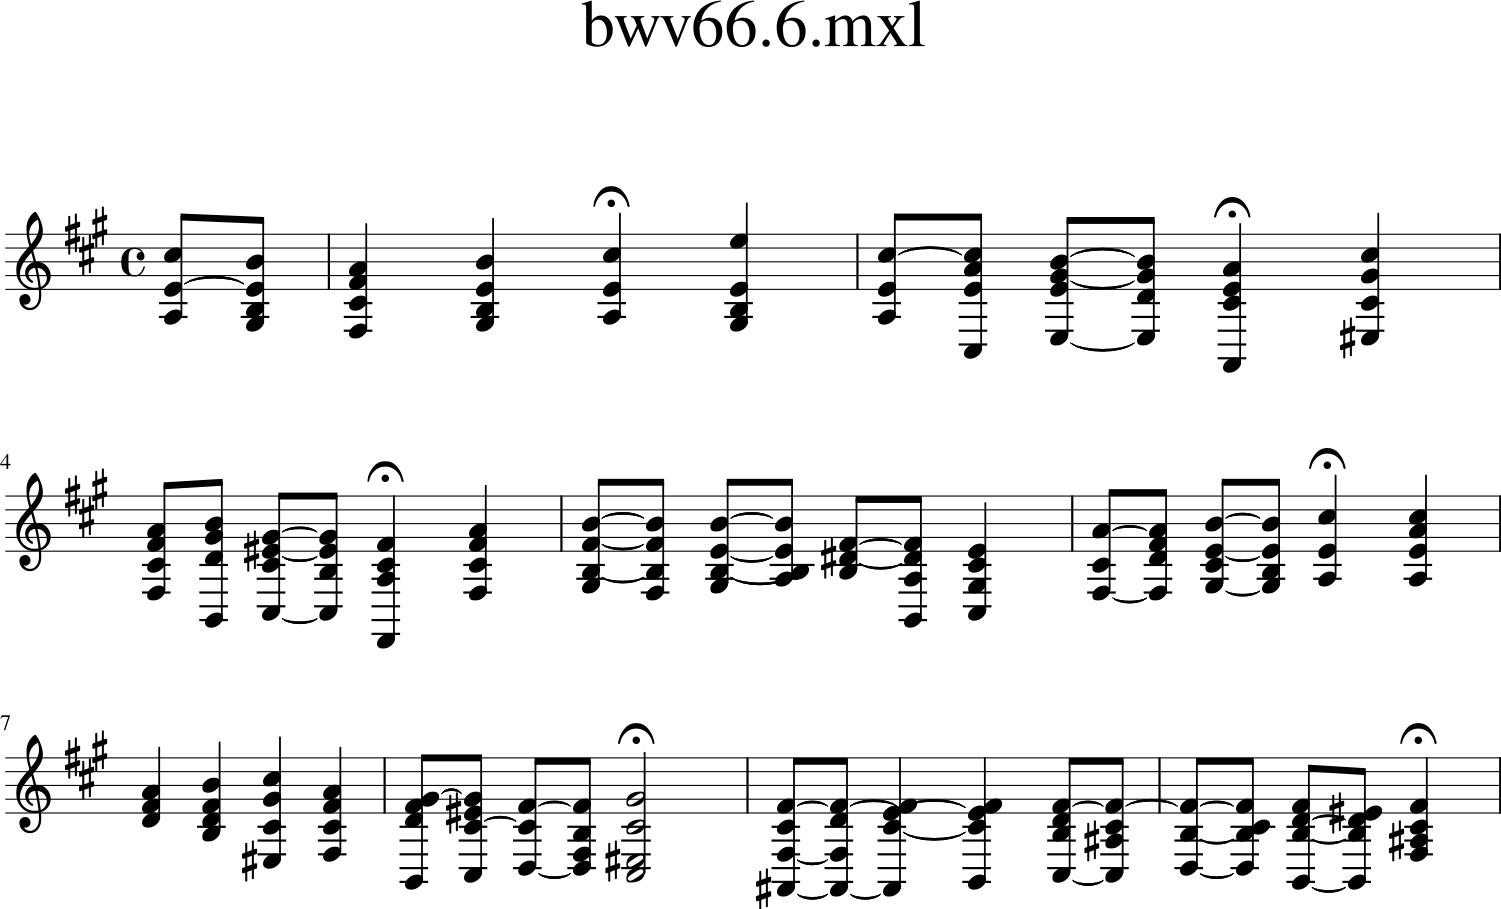

In [14]:
sChords.show()

我们可以分析每个度量的键，以表明它确实是对f＃小调的调制的一部分：

In [15]:
for m in sChords.getElementsByClass('Measure'):
    k = m.analyze('key')
    print(m.number, k)

0 E major
1 E major
2 A major
3 f# minor
4 E major
5 A major
6 f# minor
7 C# major
8 F# major
9 b minor


这是到目前为止我们可以做的一些事情的简短摘要。除此合唱团之外，我还想使用其他文章，所以让我们继续 第11章：语料库搜索以了解更多信息。